<a href="https://colab.research.google.com/github/rajat1911996sharma/TensorFlow-Regression/blob/main/DL_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#we have no null values

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#data visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


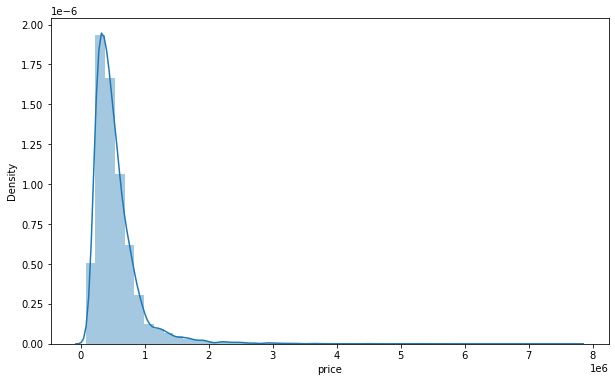

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

House prices lie upto 2 million on an average

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


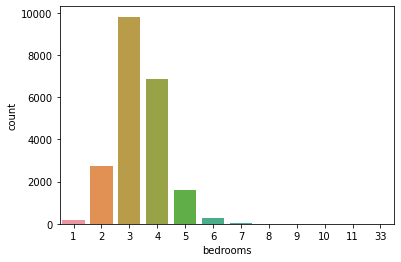

In [ ]:
sns.countplot(df['bedrooms'])
#there are majority 3 bedroom apartments

In [ ]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

High correlation 
bathrooms   
sqft_living15    
sqft_above       
grade 
sqft_living 
price            

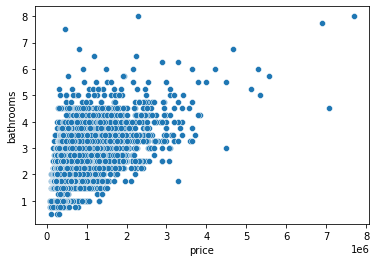

In [ ]:
sns.scatterplot(x='price',y='bathrooms',data=df)

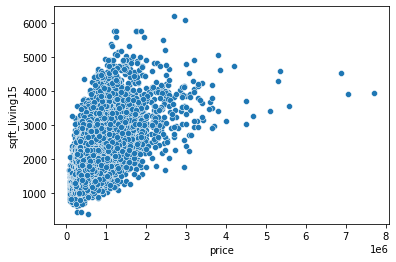

In [ ]:
sns.scatterplot(x='price',y='sqft_living15',data=df)

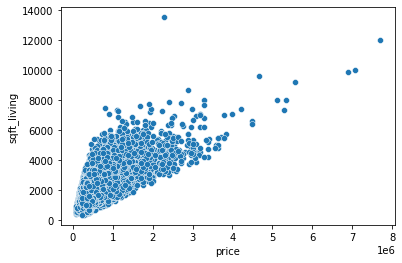

In [ ]:
sns.scatterplot(x='price',y='sqft_living',data=df)

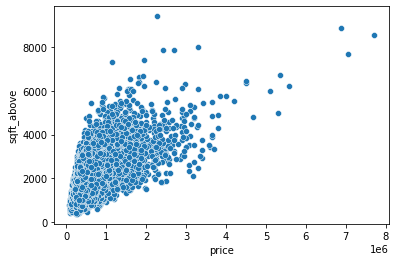

In [ ]:
sns.scatterplot(x='price',y='sqft_above',data=df)

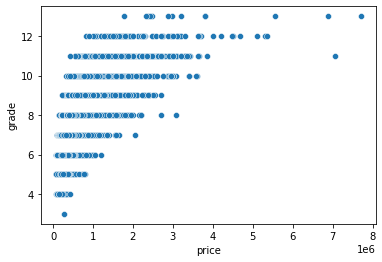

In [ ]:
sns.scatterplot(x='price',y='grade',data=df)

sqft_living,sqft_above,sqft_living15,bathrooms seems likely candidates

In [ ]:
#lets see distribution of prices with lat and long

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

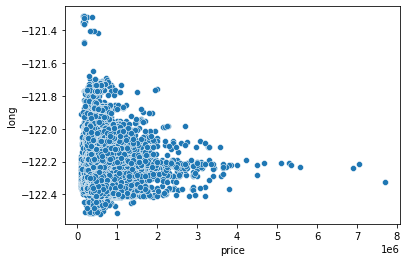

In [ ]:
sns.scatterplot(x='price',y='long',data=df)

-122.2 seems like an expensive longitude

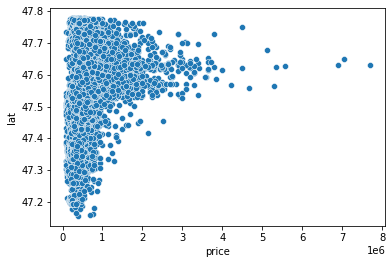

In [ ]:
sns.scatterplot(x='price',y='lat',data=df)

somewhere between 47.6 and 47.7 it is an expensive area

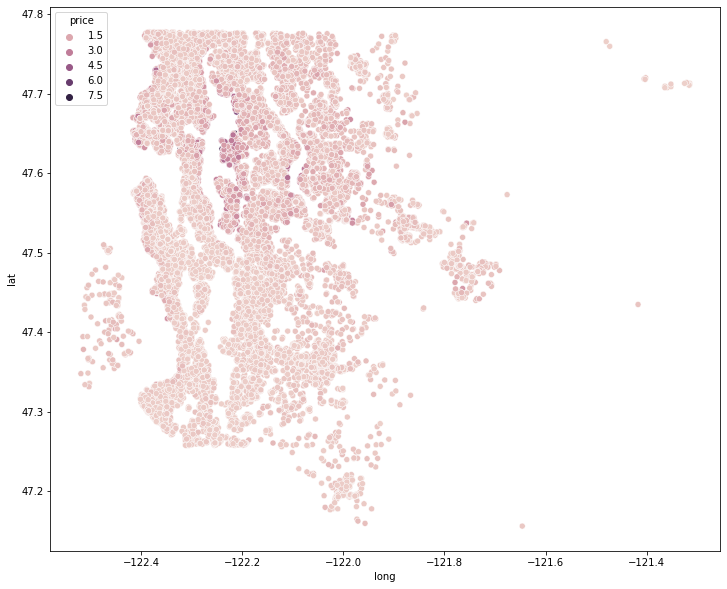

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

matches up with above conclusion

In [ ]:
#top 20 most expensive houses
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
#theres quite a bit of variation in prices and this does not capture the info we need

In [ ]:
len(df)*0.01
#top 1 % of houses

215.97

In [ ]:
#we need to find now bottom 99%
bottom_99_perc = df.sort_values('price',ascending=False).iloc[216:]

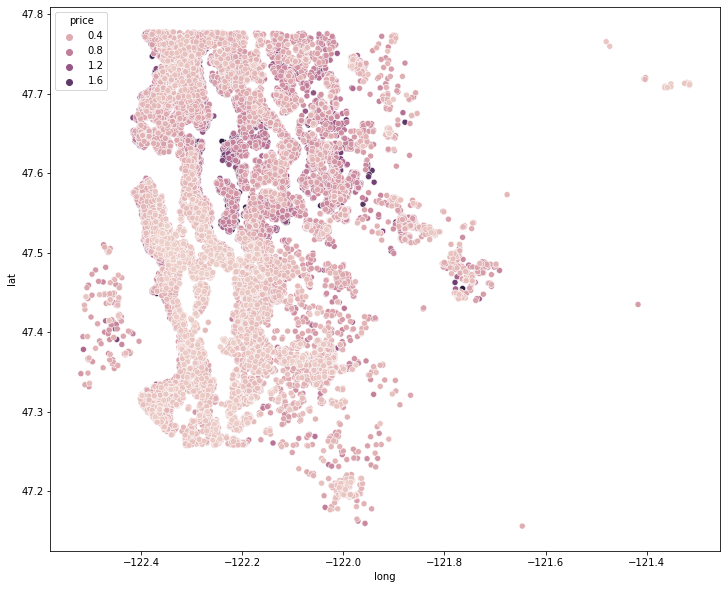

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='long',y='lat',data=bottom_99_perc,hue='price')

much more better color distribution

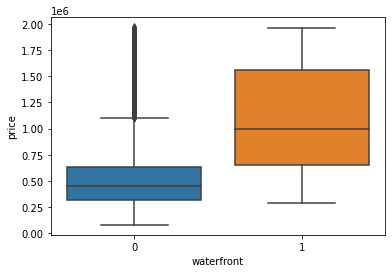

In [ ]:
#we get a feeling that houses that are near water front are costlier
sns.boxplot(x='waterfront',y='price',data=bottom_99_perc)


waterfront houses are costlier

In [ ]:
#FEATURE ENGINEERING

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#drop unnecessary att.

In [ ]:
df.drop('id',axis=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#converting datetime
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [ ]:
#it is an object
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [ ]:
df['year'] = df['date'].apply(lambda x:x.year)
df['month'] = df['date'].apply(lambda x:x.month)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


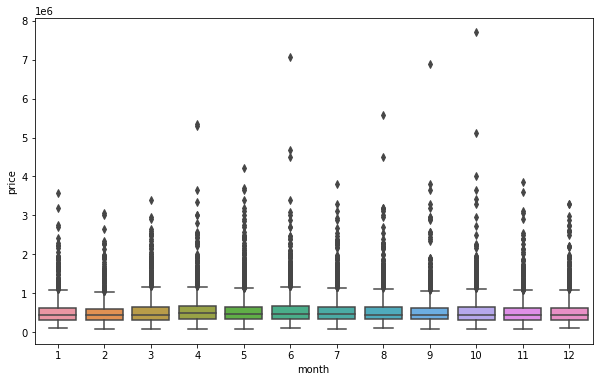

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

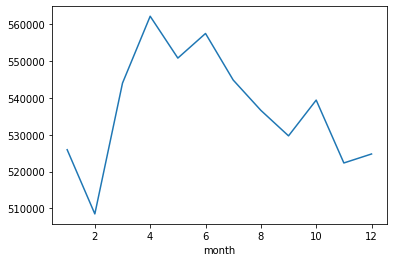

In [ ]:
df.groupby('month').mean()['price'].plot()

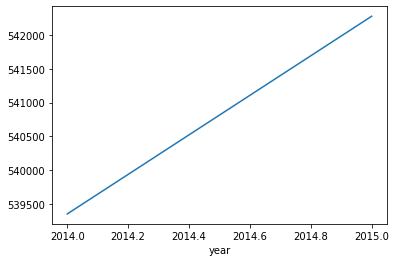

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [ ]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

more domain knowledge of zipcodes needed so are droppig them

In [ ]:
df = df.drop('zipcode',axis=1)

Data preprocessing 

In [ ]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(15117, 19)

In [ ]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430230339584.0000 - val_loss: 418857746432.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428538134528.0000 - val_loss: 413135831040.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 406856073216.0000 - val_loss: 364947931136.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 310001958912.0000 - val_loss: 218262142976.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 154651246592.0000 - val_loss: 102658875392.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 99833192448.0000 - val_loss: 94104649728.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 96485351424.0000 - val_loss: 92482011136.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 94732763136.0000 - val_loss: 90811826176.0000
Epoch 9/400
119/119 [=

In [ ]:
model.history.history

{'loss': [430230339584.0,
  428538134528.0,
  406856073216.0,
  310001958912.0,
  154651246592.0,
  99833192448.0,
  96485351424.0,
  94732763136.0,
  92965781504.0,
  91177705472.0,
  89339666432.0,
  87415570432.0,
  85476450304.0,
  83336167424.0,
  81201872896.0,
  79041945600.0,
  76692553728.0,
  74301251584.0,
  71929012224.0,
  69502525440.0,
  66995568640.0,
  64607744000.0,
  62162993152.0,
  59921436672.0,
  57895669760.0,
  56133087232.0,
  54667005952.0,
  53310119936.0,
  52228849664.0,
  51342925824.0,
  50564845568.0,
  49883361280.0,
  49279836160.0,
  48707530752.0,
  48181239808.0,
  47734145024.0,
  47282704384.0,
  46870167552.0,
  46484160512.0,
  46111383552.0,
  45756915712.0,
  45440540672.0,
  45106782208.0,
  44785618944.0,
  44469817344.0,
  44154793984.0,
  43859877888.0,
  43538771968.0,
  43115720704.0,
  42764705792.0,
  42367062016.0,
  42030456832.0,
  41661366272.0,
  41320722432.0,
  40978661376.0,
  40700510208.0,
  40446115840.0,
  40213409792.0,
 

In [ ]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302303e+11,4.188577e+11
1,4.285381e+11,4.131358e+11
2,4.068561e+11,3.649479e+11
3,3.100020e+11,2.182621e+11
4,1.546512e+11,1.026589e+11
...,...,...
395,2.921617e+10,2.695476e+10
396,2.915851e+10,2.700144e+10
397,2.929379e+10,2.692144e+10
398,2.915049e+10,2.688660e+10


In [ ]:
losses = pd.DataFrame(model.history.history)

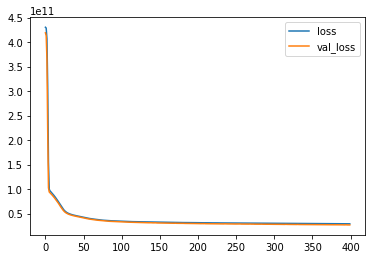

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([[415087.7 ],
       [582501.1 ],
       [598052.5 ],
       ...,
       [393547.2 ],
       [545582.2 ],
       [676917.94]], dtype=float32)

In [ ]:
mean_squared_error(y_test,predictions)

26904005848.262413

In [ ]:
mean_absolute_error(y_test,predictions)

100546.32444902585

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

164024.40625791764

In [ ]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
5.402966e+05/164024.40625791764

3.2940012546085304

In [ ]:
5.402966e+05/100546.32444902585

5.373608662084064

In [ ]:
#looks like we got a poor result
#but lets check the explained_variance_score

In [ ]:
explained_variance_score(y_test,predictions)

0.7971913386576385

In [ ]:
#it is not that bad as it initially looked like

we can plot the predictions out 

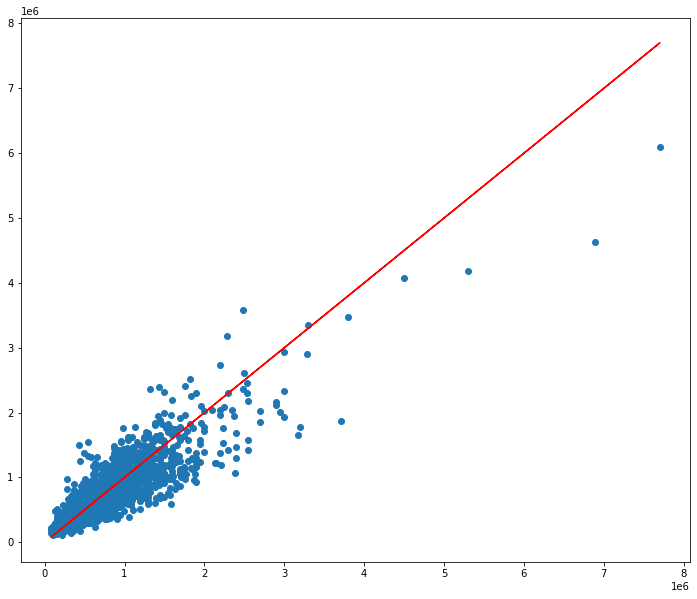

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

Outliers or the high priced houses give poor score to our predictions

In [ ]:
#predicting the model for brand new house

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
model.predict(single_house)

array([[281118.56]], dtype=float32)

In [ ]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


A little bit of overshooting but a good model